### RGB Notebook

In [1]:
import os
import secrets
from PIL import Image
import numpy as np
import pickle

In [2]:
import shutil

In [18]:
# Running the model training can take a while, lets create a function that plays music when it finishes why not?
import pygame
def soldier_timer():
    pygame.mixer.init()
    pygame.mixer.music.load("Soldier, Poet, King.mp3")
    pygame.mixer.music.play(0, 16.5)

        # Wait for the music to play before exiting
    while pygame.mixer.music.get_busy():
        try:
            pygame.time.Clock().tick(10)
        except:
            pygame.mixer.music.stop()


pygame 2.5.2 (SDL 2.28.3, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### Prepare and Train Model:

##### We already arranged our data in the Depth Notebook, so we skip that step here.

In [2]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *

In [3]:
# Set data location.

export_path = Path('Data Converted to JPG/RGB');
export_path.ls();

In [4]:
# Prepare the data using fastai DataBlock and dataloaders.

set_seed(44, reproducible=True)
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y=parent_label,
    item_tfms=Resize(640),
    batch_tfms=aug_transforms(size=420));
dls = fingers.dataloaders(export_path, bs = 32);

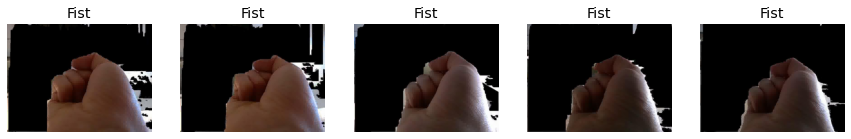

In [9]:
these_here_fingers = fingers.new(batch_tfms=aug_transforms(mult=3, max_rotate = 0, max_lighting = 0.1, max_warp = 0))
that_other_dls = these_here_fingers.dataloaders(export_path, bs = 32)
that_other_dls.valid.show_batch(max_n=5,nrows=1)

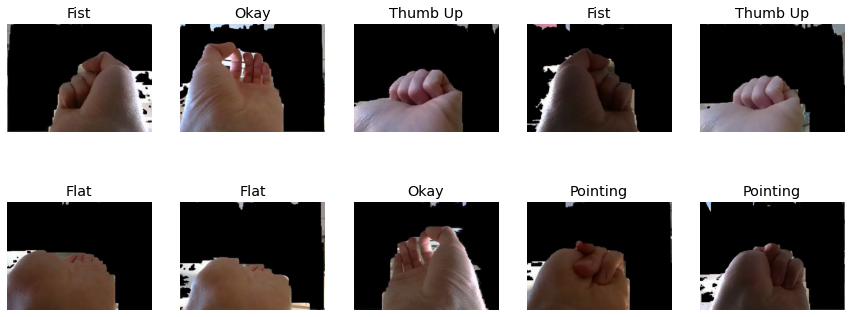

In [10]:
that_other_dls.train.show_batch(max_n=10,nrows=2)

In [11]:
from joblib import dump, load

In [12]:
import joblib

In [13]:
# Set up our RezNet neural net. Use 18 layers.

set_seed(44, reproducible=True)
machine = vision_learner(that_other_dls,resnet18,metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

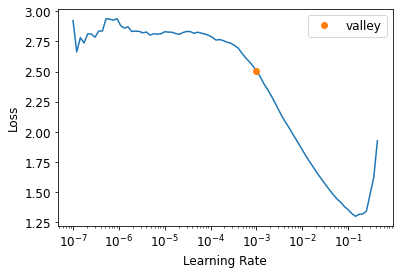

In [14]:
# Pickle the model so we we don't need to repeat the steps above if something goes wrong.

machine.lr_find()

In [135]:
machine.export('machine_pretrainin.pkl');

In [16]:
machine2 = machine

In [139]:
from fastai.learner import load_learner

# Load the entire learner
machine2 = load_learner('machine_pretrainin.pkl')

In [17]:
# Train for three cycles before unfreezing model.

set_seed(44, reproducible=True)
machine2.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.540348,0.961432,0.657143,02:18
1,0.750506,0.216750,0.933333,02:14
2,0.451893,0.058817,0.980952,02:13


SuggestedLRs(valley=9.120108734350652e-05)

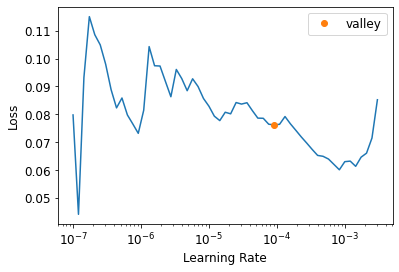

In [21]:
# Unfreeze model and find a learning rate for further training.

machine2.unfreeze()
set_seed(44, reproducible=True)
machine2.lr_find()

In [22]:
soldier_timer()

In [23]:
# 7e-5 to 2e-4 looks good judging by graph.
# Train for 7 epochs, as when we tried training longer it did not help.

set_seed(44, reproducible=True)
machine2.fit_one_cycle(7, lr_max=slice(7e-5,2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.062576,0.034659,0.980952,03:04
1,0.042635,0.002093,1.000000,03:07
2,0.038803,0.002125,1.000000,03:02
3,0.032831,0.005795,1.000000,03:07
4,0.024852,0.018243,0.990476,03:12
5,0.018920,0.011056,0.990476,02:42
6,0.015950,0.007223,1.000000,02:50


In [24]:
soldier_timer()

In [25]:
# Save resulting neural net.

machine2.export('clever_rgb_shae.pkl')

In [155]:
# Try doing a test prediction.

from fastai.vision.core import PILImage

# Load the image
img_path = 'Test Data/Depth/valid/Flat/sample58.jpg'
img = PILImage.create(img_path)

# Make a prediction
pred_class, pred_idx, outputs = machine2.predict(img)

print(f"Predicted class: {pred_class}, Predicted index: {pred_idx}, Outputs: {outputs}")

Predicted class: Flat, Predicted index: 1, Outputs: tensor([6.1406e-06, 9.9999e-01, 1.1535e-10, 1.1788e-06, 1.0412e-06])


In [156]:
from fastai.learner import load_learner
from fastai.vision.core import PILImage

# Load the exported learner
path_to_exported_file = 'clever_shae.pkl'  # Adjust the path if necessary
machine3 = load_learner(path_to_exported_file)



# Make a prediction
pred_class, pred_idx, outputs = machine3.predict(img)
print(f"Predicted class: {pred_class}")

Predicted class: Flat


In [ ]:
from fastai.vision.core import PILImage
from fastai.learner import load_learner
from fastai.vision.core import PILImage

In [158]:
import fastai
print(fastai.__version__)

2.7.13
